In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:

from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_b0229f57d26048ebbeee34c5e21b1aaf(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_bf2b79002e2f945583a88d49bdccac9b516fdec6','domain': {'id': '78a6389428974e79aa679e33dc7dc070'},
            'password': 'pQ,Mqd4X1A(VmP(s'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df = pd.read_csv(get_object_storage_file_with_credentials_b0229f57d26048ebbeee34c5e21b1aaf('BigDataRealTimecomPythooneSpark', 'taxis_bikes_nycity.csv'),parse_dates=["Data"])
df.head()


,Data,Distancia,Tempo
0,2015-08-02,1.70,NaN
1,2015-08-03,1.40,NaN
2,2015-08-04,2.10,NaN
3,2015-08-06,2.38,NaN
4,2015-08-07,2.30,NaN


In [44]:
df.dtypes

Data         datetime64[ns]
Distancia           float64
Tempo                object
dtype: object

In [13]:
df.columns

Index(['Data', 'Distancia', 'Tempo'], dtype='object')

In [14]:
df.index

RangeIndex(start=0, stop=81, step=1)

In [45]:
df.set_index("Data",inplace=True)

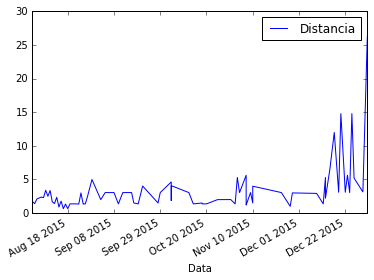

In [46]:
df.plot()

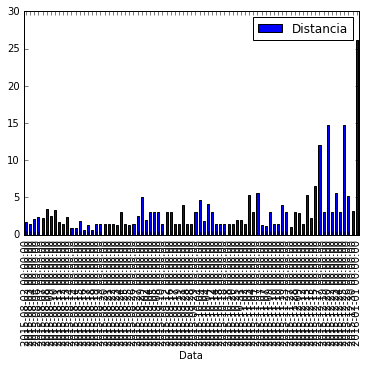

In [20]:
df.plot(kind="bar")

TypeError: 'str' object is not callable

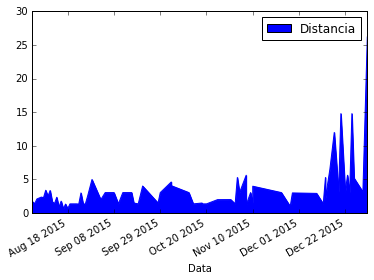

In [26]:
df.plot(kind="area")
plt.ylabel("Count")

In [27]:
df.describe()

,Distancia
count,81.000000
mean,3.137531
std,3.634519
min,0.650000
25%,1.370000
50%,2.100000
75%,3.050000
max,26.200000


In [28]:
df["2015-11"]

,Distancia,Tempo
Data,,
2015-11-02,1.37,0:08:43
2015-11-03,5.30,0:39:26
2015-11-04,3.05,0:22:12
2015-11-07,5.63,0:49:05
2015-11-07,1.26,NaN
2015-11-07,1.20,NaN
2015-11-09,3.05,0:22:36
2015-11-10,1.50,0:09:00
2015-11-10,1.50,0:11:33


# Filtrando

In [29]:
from datetime import datetime

In [30]:
start = datetime(2015,8,1)
end = datetime(2015,1,2)

In [31]:
print (start)

2015-08-01 00:00:00


In [32]:
print(end)

2015-01-02 00:00:00


In [35]:
start = df.index.min()
end = df.index.max()
df2 = pd.DataFrame(index=pd.date_range(start,end))

In [36]:
df2

""
2015-08-02
2015-08-03
2015-08-04
2015-08-05
2015-08-06
2015-08-07
2015-08-08
2015-08-09
2015-08-10
2015-08-11


In [37]:
df2.head()

""
2015-08-02
2015-08-03
2015-08-04
2015-08-05
2015-08-06


In [38]:
df.head()

,Distancia,Tempo
Data,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN


In [40]:
df.join(df2).head()

,Distancia,Tempo
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN


In [41]:
df.head()

,Distancia,Tempo
Data,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN


In [42]:
df.dtypes

Distancia    float64
Tempo         object
dtype: object

In [48]:
def calcula_total_segundos(time):
    if time is np.nan:
        return np.nan
    hrs, mins, seconds = str(time).split(":")
    seconds = int(seconds) + 60 * int(mins) + 60*60*int(hrs)
    return seconds


In [50]:

tempo_ix_0 = df.Tempo[10]

print(calcula_total_segundos(tempo_ix_0))

1045


In [51]:
df["Segundos"] = df.Tempo.map(calcula_total_segundos)

In [52]:
df

,Distancia,Tempo,Segundos
Data,,,
2015-08-02,1.70,NaN,NaN
2015-08-03,1.40,NaN,NaN
2015-08-04,2.10,NaN,NaN
2015-08-06,2.38,NaN,NaN
2015-08-07,2.30,NaN,NaN
2015-08-08,3.40,NaN,NaN
2015-08-09,2.50,NaN,NaN
2015-08-10,3.36,0:28:37,1717.0
2015-08-11,1.67,0:13:07,787.0


In [53]:
df.fillna(0)

,Distancia,Tempo,Segundos
Data,,,
2015-08-02,1.70,0,0.0
2015-08-03,1.40,0,0.0
2015-08-04,2.10,0,0.0
2015-08-06,2.38,0,0.0
2015-08-07,2.30,0,0.0
2015-08-08,3.40,0,0.0
2015-08-09,2.50,0,0.0
2015-08-10,3.36,0:28:37,1717.0
2015-08-11,1.67,0:13:07,787.0


In [54]:
df["Minutos"] = df["Segundos"].map(lambda x: x/60)

In [56]:
df.fillna(0)

,Distancia,Tempo,Segundos,Minutos
Data,,,,
2015-08-02,1.70,0,0.0,0.000000
2015-08-03,1.40,0,0.0,0.000000
2015-08-04,2.10,0,0.0,0.000000
2015-08-06,2.38,0,0.0,0.000000
2015-08-07,2.30,0,0.0,0.000000
2015-08-08,3.40,0,0.0,0.000000
2015-08-09,2.50,0,0.0,0.000000
2015-08-10,3.36,0:28:37,1717.0,28.616667
2015-08-11,1.67,0:13:07,787.0,13.116667


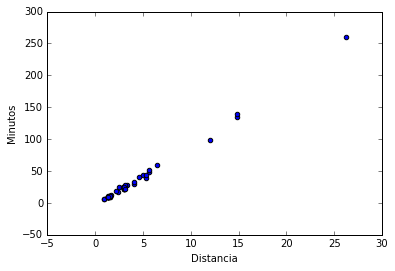

In [57]:
df.plot(x="Distancia",y="Minutos",kind="scatter")

# Correlações

In [58]:
df.corr()

,Distancia,Segundos,Minutos
Distancia,1.000000,0.997203,0.997203
Segundos,0.997203,1.000000,1.000000
Minutos,0.997203,1.000000,1.000000


In [60]:
df.corr(method="spearman")

,Distancia,Segundos,Minutos
Distancia,1.00000,0.96482,0.96482
Segundos,0.96482,1.00000,1.00000
Minutos,0.96482,1.00000,1.00000


In [61]:
df.corr(method="kendall")

,Distancia,Segundos,Minutos
Distancia,1.00000,0.88305,0.88305
Segundos,0.88305,1.00000,1.00000
Minutos,0.88305,1.00000,1.00000


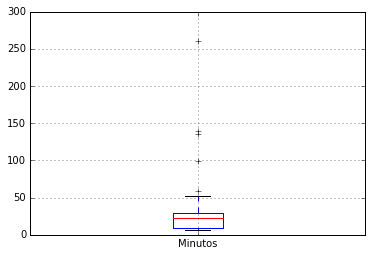

In [63]:
df.boxplot("Minutos",return_type="axes")

In [65]:
df["MinPorKm"] = df["Distancia"] / df["Minutos"]

In [66]:
df.fillna(0)

,Distancia,Tempo,Segundos,Minutos,MinPorKm
Data,,,,,
2015-08-02,1.70,0,0.0,0.000000,0.000000
2015-08-03,1.40,0,0.0,0.000000,0.000000
2015-08-04,2.10,0,0.0,0.000000,0.000000
2015-08-06,2.38,0,0.0,0.000000,0.000000
2015-08-07,2.30,0,0.0,0.000000,0.000000
2015-08-08,3.40,0,0.0,0.000000,0.000000
2015-08-09,2.50,0,0.0,0.000000,0.000000
2015-08-10,3.36,0:28:37,1717.0,28.616667,0.117414
2015-08-11,1.67,0:13:07,787.0,13.116667,0.127319


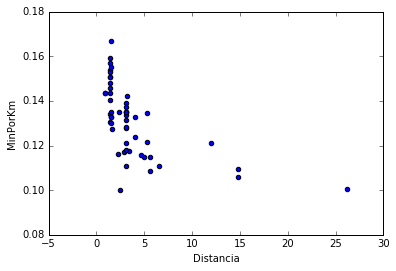

In [67]:
df.plot(x="Distancia",y="MinPorKm",kind="scatter")

TypeError: 'str' object is not callable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44a51e6358>]], dtype=object)

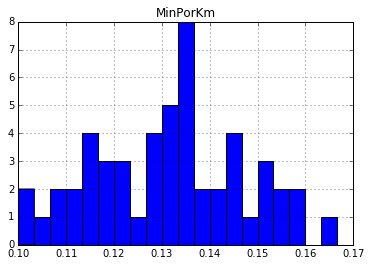

In [71]:
df.hist("MinPorKm",bins=20)